In [1]:
from obspy import read

In [8]:
st = read ('2021-10-07-mww59-near-east-coast-of-honshu-japan.miniseed')
print(st)

502 Trace(s) in Stream:

AU.MCQ.00.BHE | 2021-10-07T13:53:23.000000Z - 2021-10-07T14:04:23.000000Z | 40.0 Hz, 26401 samples
...
(500 other traces)
...
CI.PASC.10.BHZ | 2021-10-07T13:52:20.994500Z - 2021-10-07T14:03:20.994500Z | 40.0 Hz, 26401 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [13]:
tr = st[0]
print(tr)

AU.MCQ.00.BHE | 2021-10-07T13:53:23.000000Z - 2021-10-07T14:04:23.000000Z | 40.0 Hz, 26401 samples


In [14]:
data = tr.data
print(data)

[-4186 -4125 -4078 ...,  1895  1984  1991]


In [15]:
print(tr.stats)

         network: AU
         station: MCQ
        location: 00
         channel: BHE
       starttime: 2021-10-07T13:53:23.000000Z
         endtime: 2021-10-07T14:04:23.000000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 26401
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 68, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 19779072})


In [16]:
print(tr.stats.network)
print(tr.stats.npts)

AU
26401


Matplotlib is building the font cache; this may take a moment.


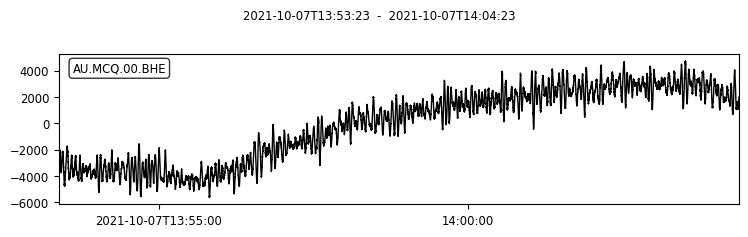

In [17]:
tr.plot();

In [20]:
from obspy.clients.fdsn import Client

client = Client('IRIS')

In [21]:
from obspy import UTCDateTime

In [36]:
time = UTCDateTime('2021-10-07T13:53:23')
print(time)

2021-10-07T13:53:23.000000Z


In [37]:
starttime = time - 60
print(starttime)

2021-10-07T13:52:23.000000Z


In [38]:
endtime = time +15*60
print(endtime)

2021-10-07T14:08:23.000000Z


In [39]:
net = 'AU'
sta = 'MCQ'
loc = '00'
chan = 'BHE'

1 Trace(s) in Stream:
AU.MCQ.00.BHE | 2021-10-07T13:52:23.000000Z - 2021-10-07T14:08:23.000000Z | 40.0 Hz, 38401 samples


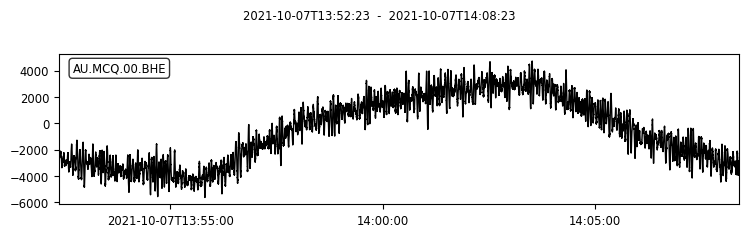

In [40]:
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();

3 Trace(s) in Stream:
AU.MCQ.00.BHE | 2021-10-07T13:52:23.000000Z - 2021-10-07T14:08:23.000000Z | 40.0 Hz, 38401 samples
AU.MCQ.00.BHN | 2021-10-07T13:52:23.000000Z - 2021-10-07T14:08:23.000000Z | 40.0 Hz, 38401 samples
AU.MCQ.00.BHZ | 2021-10-07T13:52:23.000000Z - 2021-10-07T14:08:23.000000Z | 40.0 Hz, 38401 samples


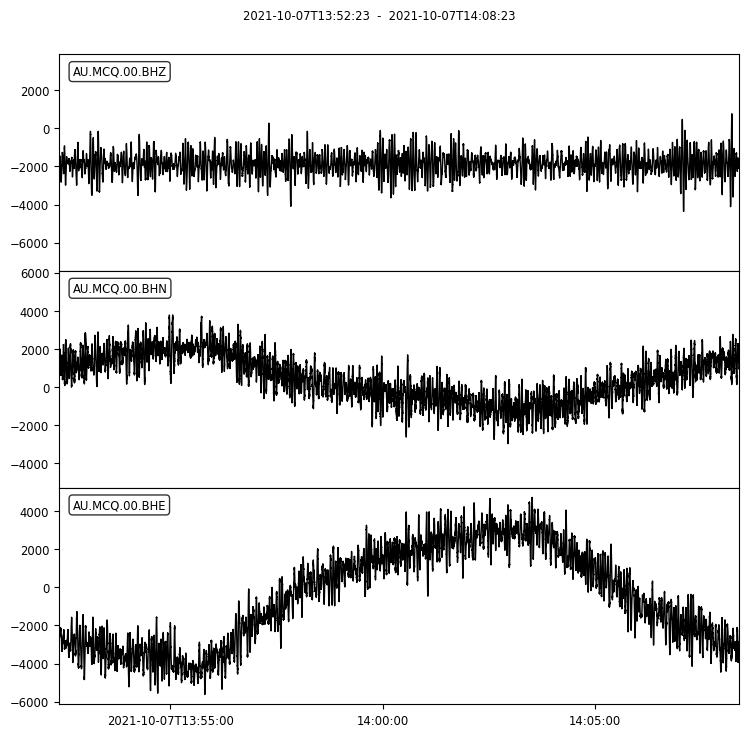

In [41]:
chan = 'BH*'
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();